In [39]:
import requests
import pandas as pd
import json
import math
import time
import matplotlib.pyplot as plt
from datetime import datetime
import re

In [40]:
# 그래프 그릴 때 필수 속성(한글과 마이너스 폰트 깨짐 방지)
# 폰트설정
plt.rc("font", family='Malgun Gothic')

# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)

In [41]:
url='http://apis.data.go.kr/1400377/forestPoint/forestPointListSigunguSearch'

In [42]:
params = {
    'ServiceKey' : 'tMni1X9YjwDA/tpa7kDT1bx0479zQIVJtWb8VTTqzcrYALagHW6uAvmlvO5mFvnBkkoaCmxoa8Ptr2c4mny1kA==',
    'pageNo': 1,
    'numOfRows':10,
    '_type':'json',
    'excludeForecast' : 0
}

In [43]:
res = requests.get(url,params=params)
res.status_code

200

In [44]:
res.url

'http://apis.data.go.kr/1400377/forestPoint/forestPointListSigunguSearch?ServiceKey=tMni1X9YjwDA%2Ftpa7kDT1bx0479zQIVJtWb8VTTqzcrYALagHW6uAvmlvO5mFvnBkkoaCmxoa8Ptr2c4mny1kA%3D%3D&pageNo=1&numOfRows=10&_type=json&excludeForecast=0'

In [45]:
json_str = res.text

In [46]:
dictionary = json.loads(json_str)

In [47]:
df = pd.json_normalize(dictionary['response']['body']['items']['item'])
df.head()

,analdate,area,d1,d2,d3,d4,doname,maxi,meanavg,mini,regioncode,sigucode,sigun,std,upplocalcd
0,2024-04-12 08,240,97,3,0,0,서울특별시,55,33,11,11110,11110,종로구,9,11
1,2024-04-12 15,240,0,1,95,4,서울특별시,88,74,66,11110,11110,종로구,5,11
2,2024-04-12 18,240,0,74,26,0,서울특별시,75,60,52,11110,11110,종로구,5,11
3,2024-04-12 21,240,100,0,0,0,서울특별시,48,30,19,11110,11110,종로구,7,11
4,2024-04-13 00,240,100,0,0,0,서울특별시,42,23,12,11110,11110,종로구,7,11


In [48]:
# 컬럼명 변경
df = df.rename(columns={
    'analdate': '기준일자',
    'area': '면적',
    'd1':'낮음',
    'd2':'다소높음',
    'd3':'높음',
    'd4':'매우높음',
    'doname':'시도명',
    'maxi':'최댓값',
    'meanavg':'평균',
    'mini':'최솟값',
    'regioncode': '지역코드',
    'sigucode':'시군구 코드',
    'sigun':'시군구',
    'std':'표준편차',
    'upplocalcd':'시도 코드'
                       })
df.head(2)

,기준일자,면적,낮음,다소높음,높음,매우높음,시도명,최댓값,평균,최솟값,지역코드,시군구 코드,시군구,표준편차,시도 코드
0,2024-04-12 08,240,97,3,0,0,서울특별시,55,33,11,11110,11110,종로구,9,11
1,2024-04-12 15,240,0,1,95,4,서울특별시,88,74,66,11110,11110,종로구,5,11


In [49]:
df.shape

(4803, 15)

In [50]:
# 결측치
df.isnull().sum()

기준일자      7
면적        0
낮음        0
다소높음      0
높음        0
매우높음      0
시도명       0
최댓값       0
평균        0
최솟값       0
지역코드      0
시군구 코드    0
시군구       0
표준편차      0
시도 코드     0
dtype: int64

In [51]:
df.iloc[0,0]

'2024-04-12 08'

In [52]:
# df.to_excel(f'산불위험예보정보_{df.iloc[0,0]}.xlsx', index=False)

In [53]:
# 기준일자 결측치 제거
df.dropna(subset=['기준일자'],inplace=True)

In [54]:
df.isnull().sum()

기준일자      0
면적        0
낮음        0
다소높음      0
높음        0
매우높음      0
시도명       0
최댓값       0
평균        0
최솟값       0
지역코드      0
시군구 코드    0
시군구       0
표준편차      0
시도 코드     0
dtype: int64

In [55]:
df.dtypes

기준일자      object
면적        object
낮음         int64
다소높음       int64
높음         int64
매우높음       int64
시도명       object
최댓값        int64
평균         int64
최솟값        int64
지역코드      object
시군구 코드    object
시군구       object
표준편차       int64
시도 코드      int64
dtype: object

In [56]:
# 기준일자 datetime으로 타입 변경
df['기준일자']=pd.to_datetime(df['기준일자'])

In [57]:
# 면적 숫자형 타입으로 변경
df['면적'] = df['면적'].apply(lambda x : pd.to_numeric(re.sub(r',','',str(x))))

In [58]:
df.dtypes

기준일자      datetime64[ns]
면적                 int64
낮음                 int64
다소높음               int64
높음                 int64
매우높음               int64
시도명               object
최댓값                int64
평균                 int64
최솟값                int64
지역코드              object
시군구 코드            object
시군구               object
표준편차               int64
시도 코드              int64
dtype: object

In [59]:
df.isnull().sum()

기준일자      0
면적        0
낮음        0
다소높음      0
높음        0
매우높음      0
시도명       0
최댓값       0
평균        0
최솟값       0
지역코드      0
시군구 코드    0
시군구       0
표준편차      0
시도 코드     0
dtype: int64

In [60]:
# df['면적']=pd.to_numeric(df['면적'])

In [61]:
df.tail(10)

,기준일자,면적,낮음,다소높음,높음,매우높음,시도명,최댓값,평균,최솟값,지역코드,시군구 코드,시군구,표준편차,시도 코드
4793,2024-04-13 21:00:00,4931,100,0,0,0,전북특별자치도,42,24,12,52800,52800,부안군,7,52
4794,2024-04-14 00:00:00,4931,100,0,0,0,전북특별자치도,35,24,11,52800,52800,부안군,6,52
4795,2024-04-14 03:00:00,4931,100,0,0,0,전북특별자치도,35,24,11,52800,52800,부안군,6,52
4796,2024-04-14 06:00:00,4931,100,0,0,0,전북특별자치도,35,24,11,52800,52800,부안군,6,52
4797,2024-04-14 09:00:00,4931,100,0,0,0,전북특별자치도,55,28,12,52800,52800,부안군,8,52
4798,2024-04-14 12:00:00,4931,22,47,29,2,전북특별자치도,95,60,30,52800,52800,부안군,11,52
4799,2024-04-14 15:00:00,4931,29,42,28,0,전북특별자치도,95,58,30,52800,52800,부안군,11,52
4800,2024-04-14 18:00:00,4931,36,47,17,0,전북특별자치도,82,54,23,52800,52800,부안군,10,52
4801,2024-04-14 21:00:00,4931,96,4,0,0,전북특별자치도,68,35,17,52800,52800,부안군,9,52
4802,2024-04-15 00:00:00,4931,100,0,0,0,전북특별자치도,55,27,12,52800,52800,부안군,8,52


In [62]:
df.columns

Index(['기준일자', '면적', '낮음', '다소높음', '높음', '매우높음', '시도명', '최댓값', '평균', '최솟값',
       '지역코드', '시군구 코드', '시군구', '표준편차', '시도 코드'],
      dtype='object')

In [63]:
df=df[['기준일자','지역코드','시도 코드','시도명','시군구 코드','시군구','면적', '낮음', '다소높음', '높음', '매우높음',  '최댓값', '평균', '최솟값',
         '표준편차']]

In [64]:
df.iloc[0,0].date()

datetime.date(2024, 4, 12)

In [65]:
df.groupby('시도명')[['면적']].mean()

,면적
시도명,
강원특별자치도,9246.500000
경기도,3277.935484
경상남도,5838.055556
경상북도,8374.454545
광주광역시,996.800000
대구광역시,1660.777778
대전광역시,1079.800000
부산광역시,479.750000
서울특별시,242.320000


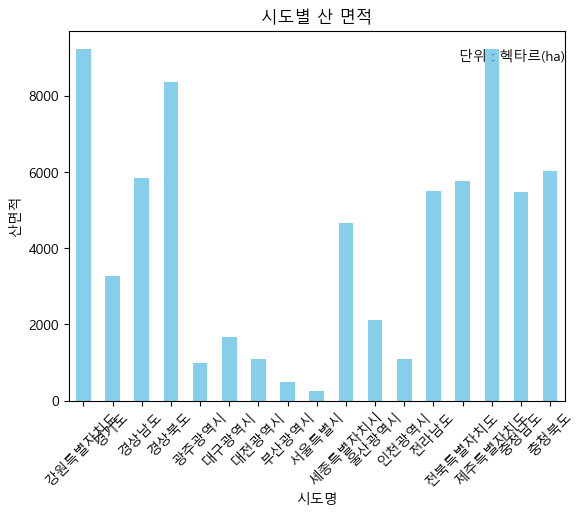

In [66]:
# 시도별 산 면적
df.groupby('시도명')['면적'].mean().plot.bar(rot=45, color='skyblue')
plt.title('시도별 산 면적')
plt.ylabel('산면적')
plt.xlabel('시도명')
plt.text(1, 0.95, '단위 : 헥타르(ha)', horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes)
plt.show()

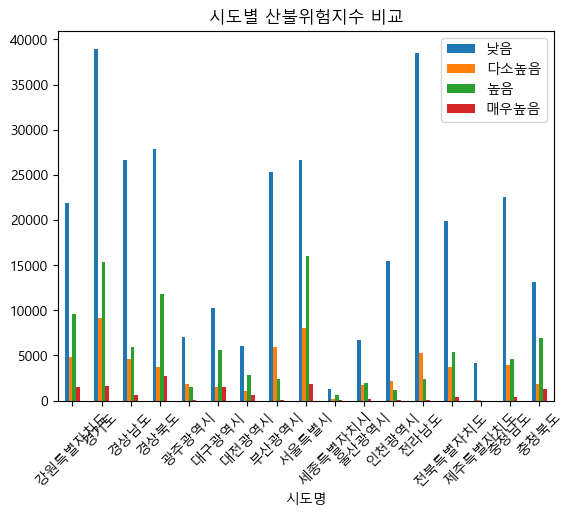

In [67]:
# 시도별 산불위험지수 비교
df.groupby('시도명')[['낮음', '다소높음','높음','매우높음']].sum().plot.bar(rot=45)
plt.title('시도별 산불위험지수 비교')
plt.show()

In [68]:
# 시도별 매우높음의 평균
df.groupby('시도명').apply(lambda x : x.nlargest(1, '매우높음')[['시군구','평균']])

,,시군구,평균
시도명,,,
강원특별자치도,4211,동해시,81
경기도,1880,오산시,86
경상남도,3930,창녕군,85
경상북도,3321,안동시,82
광주광역시,1305,남구,75
대구광역시,954,북구,85
대전광역시,1418,서구,82
부산광역시,743,금정구,72
서울특별시,93,광진구,85


Text(0, 0.5, '시도명, 위험지수 평균')

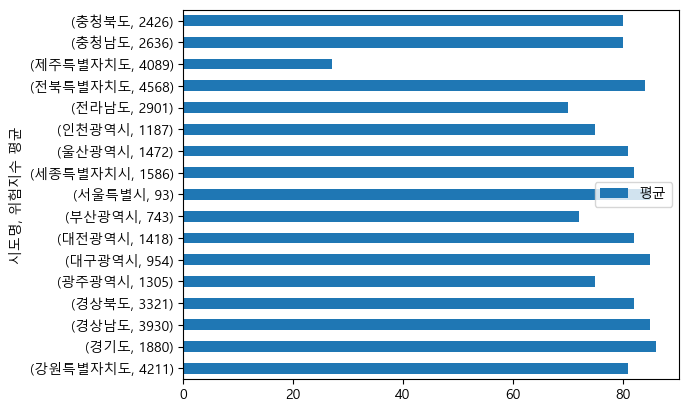

In [69]:
# 각 시도별 위험지수 평균 추이
df.groupby('시도명').apply(lambda x : x.nlargest(1, '매우높음')[['시군구','평균']]).plot.barh()
plt.ylabel('시도명, 위험지수 평균')

In [70]:
df.iloc[0,0].time()

datetime.time(8, 0)

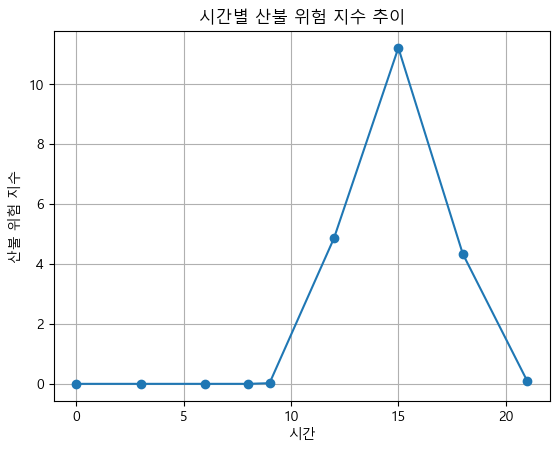

In [71]:
# 전국 시간별 산불 위험 지수 추이 시각화
df.groupby(df['기준일자'].dt.hour)['매우높음'].mean().plot(marker='o')
plt.title('시간별 산불 위험 지수 추이')
plt.xlabel('시간')
plt.ylabel('산불 위험 지수')
plt.grid(True)
plt.show()

Text(0.5, 1.0, '매우높음')

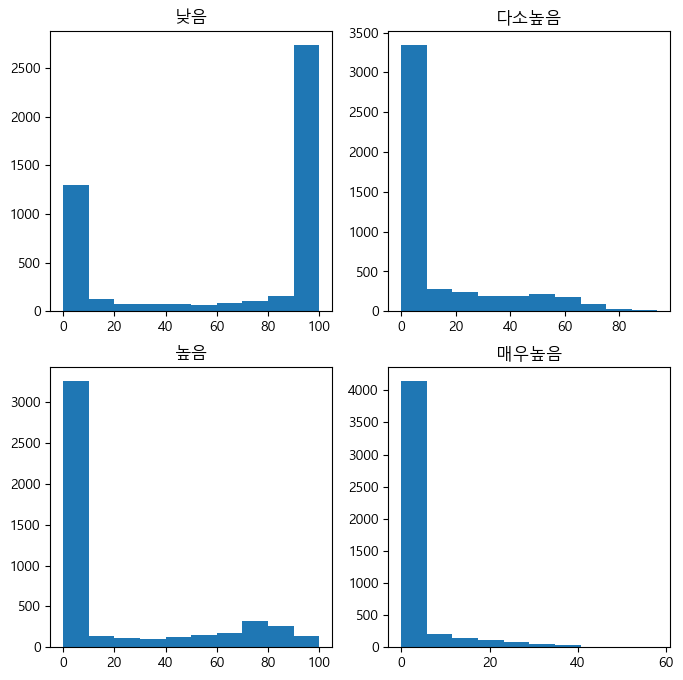

In [72]:
# 전국 예보지수 (낮음,'다소높음', '높음', '매우높음') 별 추이
fig, axs = plt.subplots(2,2,figsize=(8,8))
axs[0,0].hist(df['낮음'],label='낮음')
axs[0,0].set_title('낮음')

axs[0,1].hist(df['다소높음'],label='다소높음')
axs[0,1].set_title('다소높음')

axs[1,0].hist(df['높음'],label='높음')
axs[1,0].set_title('높음')

axs[1,1].hist(df['매우높음'],label='매우높음')
axs[1,1].set_title('매우높음')


In [73]:
df.columns

Index(['기준일자', '지역코드', '시도 코드', '시도명', '시군구 코드', '시군구', '면적', '낮음', '다소높음',
       '높음', '매우높음', '최댓값', '평균', '최솟값', '표준편차'],
      dtype='object')

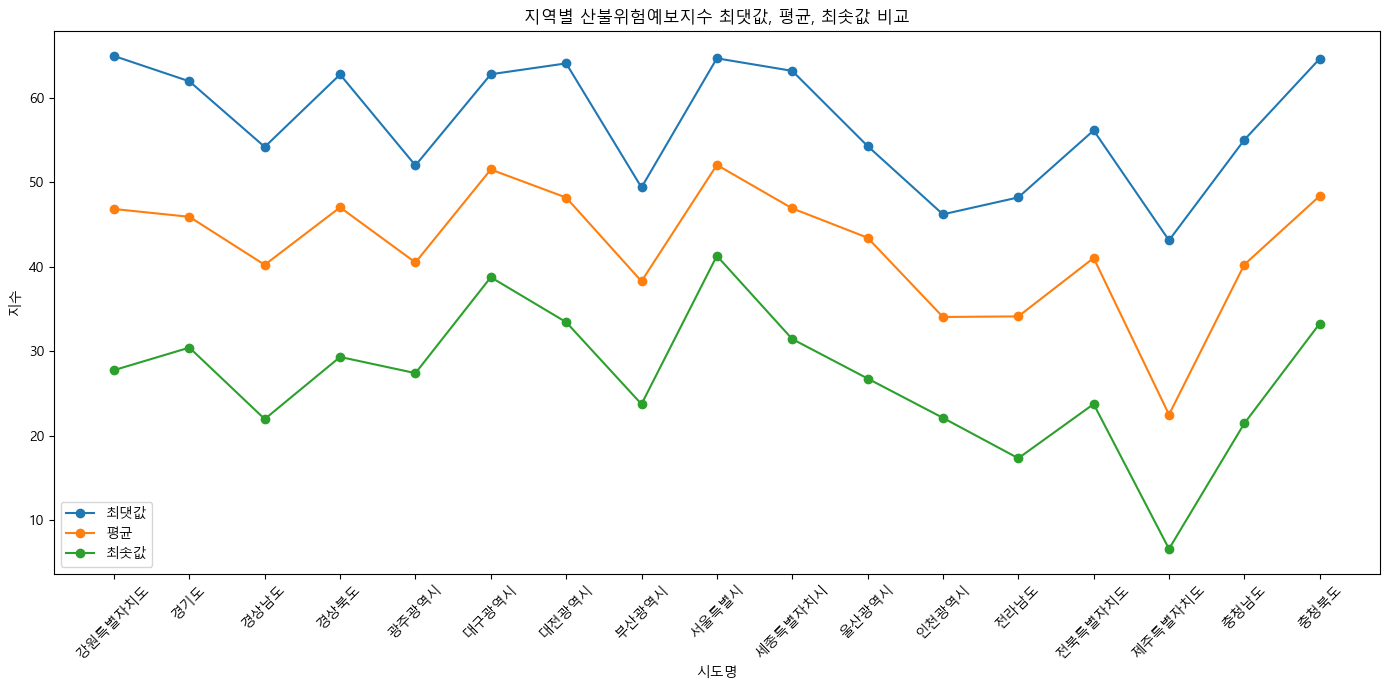

In [74]:
# 산불위험 최댓값, 평균, 최솟값 비교
summary_stats = df.groupby('시도명')[['최댓값', '평균', '최솟값']].mean().reset_index()

plt.figure(figsize=(14, 7))
for column in ['최댓값', '평균', '최솟값']:
    plt.plot(summary_stats['시도명'], summary_stats[column], marker='o', label=column)
plt.title('지역별 산불위험예보지수 최댓값, 평균, 최솟값 비교')
plt.xticks(rotation=45)
plt.xlabel('시도명')
plt.ylabel('지수')
plt.legend()
plt.tight_layout()
plt.show()

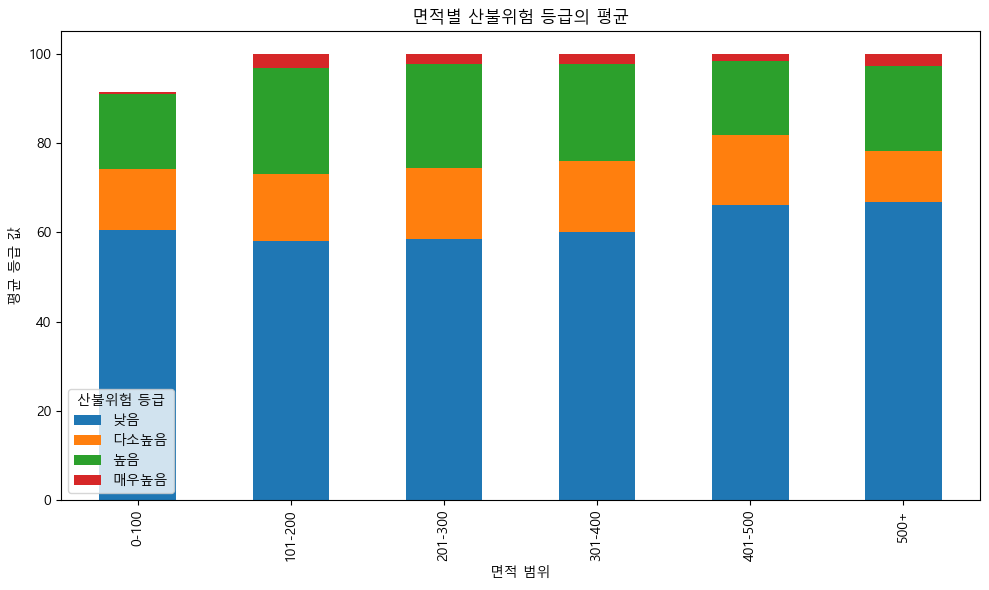

In [75]:
# 면적별 산불위험 등급의 평균
df['면적범위'] = pd.cut(df['면적'], bins=[0, 100, 200, 300, 400, 500, max(df['면적'])], labels=['0-100', '101-200', '201-300', '301-400', '401-500', '500+'])
area_risk_avg = df.groupby('면적범위')[['낮음', '다소높음', '높음', '매우높음']].mean().reset_index()
area_risk_avg.plot(x='면적범위', kind='bar', stacked=True, figsize=(10, 6))
plt.title('면적별 산불위험 등급의 평균')
plt.xlabel('면적 범위')
plt.ylabel('평균 등급 값')
plt.legend(title='산불위험 등급')
plt.tight_layout()
plt.show()

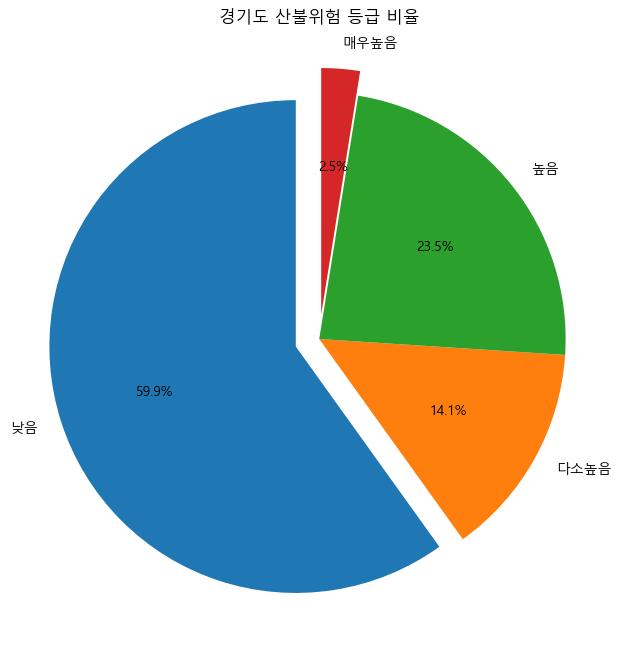

In [76]:
# 특정 지역 데이터 선택 (예: '경기도')
특정지역_df = df[df['시도명'] == '경기도']
risk_counts = 특정지역_df[['낮음', '다소높음', '높음', '매우높음']].mean()
plt.figure(figsize=(8, 8))
explode = (0.1, 0, 0, 0.1)  # 첫 번째와 마지막 조각을 약간 떨어뜨림
risk_counts.plot(kind='pie', autopct='%1.1f%%', explode=explode, startangle=90)
plt.title('경기도 산불위험 등급 비율')
plt.ylabel('')  # y축 라벨 제거
plt.show()